In [14]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import time

In [15]:
Product_Name=[]
Rating=[]
No_Of_Ratings=[]
Specifications=[]
Price=[]
Original_Price=[]
Discount=[]
Page=[]

In [16]:
Total_Time=time.time()
for page in range(1,300):
    start_time=time.time()
    url=f"https://www.flipkart.com/search?q=smartphone&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_5_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_5_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=smartphone%7CMobiles&requestId=0a37bdd0-8313-49ef-a6bd-6ab92266b634&as-searchtext=Smart&page={page}"
    response=requests.get(url)
    soup=BeautifulSoup(response.text,"html.parser")

    products=soup.find_all("div",attrs={"class":"ZFwe0M row"})
    for product in products:
        pname=product.find("div",attrs={"class":"RG5Slk"})
        rating=product.find("div",attrs={"class":"MKiFS6"})
        no_of_ratings=product.find("span",attrs={"class":"PvbNMB"})
        specifications=product.find("div",attrs={"class":"CMXw7N"})
        price=product.find("div",attrs={"class":"hZ3P6w DeU9vF"})
        original_price=product.find("div",attrs={"class":"kRYCnD gxR4EY"})
        discount=product.find("div",attrs={"class":"HQe8jr"})

        Product_Name.append(pname.text if pname else np.nan)
        Rating.append(rating.text if rating else np.nan)
        No_Of_Ratings.append(no_of_ratings.text if no_of_ratings else np.nan)
        Specifications.append(specifications.text if specifications else np.nan)
        Price.append(price.text if price else np.nan)
        Original_Price.append(original_price.text if original_price else np.nan)
        Discount.append(discount.text if discount else np.nan)
        Page.append(page)
    print(f"Page {page} is completed in {time.time()-start_time:.2f} seconds")
print(f"total time to parse 100 pages is {time.time()-Total_Time:.2f} seconds")  

Page 1 is completed in 0.54 seconds
Page 2 is completed in 0.45 seconds
Page 3 is completed in 0.59 seconds
Page 4 is completed in 0.46 seconds
Page 5 is completed in 0.53 seconds
Page 6 is completed in 0.70 seconds
Page 7 is completed in 0.74 seconds
Page 8 is completed in 0.68 seconds
Page 9 is completed in 0.63 seconds
Page 10 is completed in 0.50 seconds
Page 11 is completed in 0.44 seconds
Page 12 is completed in 0.61 seconds
Page 13 is completed in 0.53 seconds
Page 14 is completed in 0.64 seconds
Page 15 is completed in 0.64 seconds
Page 16 is completed in 0.44 seconds
Page 17 is completed in 0.65 seconds
Page 18 is completed in 0.56 seconds
Page 19 is completed in 0.45 seconds
Page 20 is completed in 0.55 seconds
Page 21 is completed in 0.47 seconds
Page 22 is completed in 0.43 seconds
Page 23 is completed in 0.60 seconds
Page 24 is completed in 0.43 seconds
Page 25 is completed in 0.46 seconds
Page 26 is completed in 0.63 seconds
Page 27 is completed in 0.48 seconds
Page 28 is

In [17]:
df=pd.DataFrame({
    "Product_Name":Product_Name,
    "Rating":Rating,
    "No_Of_Ratings":No_Of_Ratings,
    "Specifications":Specifications,
    "Price":Price,
    "Original_Price":Original_Price,
    "Discount":Discount,
    "Page":Page})

In [19]:
df.to_csv("Flipkart_Mobiles_Data.csv",index=False)

In [82]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [127]:
data=pd.read_csv("Flipkart_Mobiles_Data.csv")

In [128]:
data.head(10)

,Product_Name,Rating,No_Of_Ratings,Specifications,Price,Original_Price,Discount,Page
0,"POCO C71 (Desert Gold, 128 GB)",4.1,"30,602 Ratings & 1,450 Reviews",6 GB RAM | 128 GB ROM | Expandable Upto 2 TB17...,"₹7,499","₹9,999",25% off,1
1,"Samsung Galaxy F07 (Green, 64 GB)",4.3,"2,647 Ratings & 136 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 2 TB17....,"₹7,849","₹9,999",21% off,1
2,"MOTOROLA g35 5G (Midnight Black, 128 GB)",4.2,"1,17,212 Ratings & 7,254 Reviews",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,"₹9,999","₹12,499",20% off,1
3,"POCO C71 (Cool Blue, 64 GB)",3.9,"54,664 Ratings & 2,462 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 2 TB17....,"₹6,799","₹8,999",24% off,1
4,"Ai+ Pulse (Blue, 64 GB)",4.3,"40,425 Ratings & 2,483 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB17....,"₹6,499","₹7,999",18% off,1


In [129]:
data.tail()

,Product_Name,Rating,No_Of_Ratings,Specifications,Price,Original_Price,Discount,Page
979,"Samsung Galaxy M55 5G (Light Green, 256 GB)",4.0,163 Ratings & 13 Reviews,12 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Disp...,"₹22,490","₹34,999",35% off,41
980,"LAVA Agni 3 5G (Pristine Glass, 128 GB)",3.8,226 Ratings & 27 Reviews,8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Displ...,"₹19,149","₹25,999",26% off,41
981,"vivo V50 5G (Rose Red, 256 GB)",4.5,"8,087 Ratings & 654 Reviews",8 GB RAM | 256 GB ROM17.2 cm (6.77 inch) Displ...,"₹34,999","₹42,999",18% off,41
982,"Nothing Phone (2a) 5G (Black, 256 GB)",4.4,"16,468 Ratings & 1,219 Reviews",12 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full...,"₹27,999","₹29,999",6% off,41
983,"Samsung Galaxy Z Flip5 (Mint, 512 GB)",4.4,860 Ratings & 50 Reviews,8 GB RAM | 512 GB ROM17.02 cm (6.7 inch) Displ...,"₹1,09,999","₹1,13,999",3% off,41


In [130]:
data.shape

(984, 8)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_Name    984 non-null    object 
 1   Rating          984 non-null    float64
 2   No_Of_Ratings   984 non-null    object 
 3   Specifications  984 non-null    object 
 4   Price           984 non-null    object 
 5   Original_Price  939 non-null    object 
 6   Discount        932 non-null    object 
 7   Page            984 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 61.6+ KB


In [132]:
data.isnull().sum()

Product_Name       0
Rating             0
No_Of_Ratings      0
Specifications     0
Price              0
Original_Price    45
Discount          52
Page               0
dtype: int64

In [133]:
data["Original_Price"].fillna(data["Original_Price"].mode()[0],inplace=True)

In [134]:
data["Discount"].fillna(data["Discount"].mode()[0],inplace=True)

In [135]:
data.isnull().sum()

Product_Name      0
Rating            0
No_Of_Ratings     0
Specifications    0
Price             0
Original_Price    0
Discount          0
Page              0
dtype: int64

In [136]:
data.duplicated().sum()

np.int64(0)

In [137]:
data.head()

,Product_Name,Rating,No_Of_Ratings,Specifications,Price,Original_Price,Discount,Page
0,"POCO C71 (Desert Gold, 128 GB)",4.1,"30,602 Ratings & 1,450 Reviews",6 GB RAM | 128 GB ROM | Expandable Upto 2 TB17...,"₹7,499","₹9,999",25% off,1
1,"Samsung Galaxy F07 (Green, 64 GB)",4.3,"2,647 Ratings & 136 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 2 TB17....,"₹7,849","₹9,999",21% off,1
2,"MOTOROLA g35 5G (Midnight Black, 128 GB)",4.2,"1,17,212 Ratings & 7,254 Reviews",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,"₹9,999","₹12,499",20% off,1
3,"POCO C71 (Cool Blue, 64 GB)",3.9,"54,664 Ratings & 2,462 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 2 TB17....,"₹6,799","₹8,999",24% off,1
4,"Ai+ Pulse (Blue, 64 GB)",4.3,"40,425 Ratings & 2,483 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB17....,"₹6,499","₹7,999",18% off,1


In [138]:
data["Brand"]=data["Product_Name"].apply(lambda x : re.search(r"^\w+",x)[0])

In [139]:
data["Brand"].value_counts()

Brand
realme      169
Samsung     141
vivo        103
REDMI        87
OPPO         82
POCO         82
OnePlus      47
MOTOROLA     47
Tecno        43
IQOO         35
Motorola     25
Ai           24
Infinix      24
Nothing      20
LAVA         16
Apple        14
CMF           8
Google        8
Xiaomi        5
nuveck        2
I             1
itel          1
Name: count, dtype: int64

In [140]:
data.head()

,Product_Name,Rating,No_Of_Ratings,Specifications,Price,Original_Price,Discount,Page,Brand
0,"POCO C71 (Desert Gold, 128 GB)",4.1,"30,602 Ratings & 1,450 Reviews",6 GB RAM | 128 GB ROM | Expandable Upto 2 TB17...,"₹7,499","₹9,999",25% off,1,POCO
1,"Samsung Galaxy F07 (Green, 64 GB)",4.3,"2,647 Ratings & 136 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 2 TB17....,"₹7,849","₹9,999",21% off,1,Samsung
2,"MOTOROLA g35 5G (Midnight Black, 128 GB)",4.2,"1,17,212 Ratings & 7,254 Reviews",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,"₹9,999","₹12,499",20% off,1,MOTOROLA
3,"POCO C71 (Cool Blue, 64 GB)",3.9,"54,664 Ratings & 2,462 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 2 TB17....,"₹6,799","₹8,999",24% off,1,POCO
4,"Ai+ Pulse (Blue, 64 GB)",4.3,"40,425 Ratings & 2,483 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB17....,"₹6,499","₹7,999",18% off,1,Ai


In [141]:
data["RAM"]=data["Specifications"].apply(
    lambda x: re.findall(r"\d+(?= GB RAM)", x)[-1] if re.search(r"\d+(?= GB RAM)", x) else None
)

In [142]:
data["Storage"]=data["Specifications"].apply(
    lambda x: re.findall(r"\d+(?= GB ROM)", x)[-1] if re.search(r"\d+(?= GB ROM)", x) else None
)

In [143]:
data["Battery_Capacity"]=data["Specifications"].apply(
    lambda x: re.findall(r"\d+ [A-z]{3}(?= Battery)", x)[-1] if re.search(r"\d+ [A-z]{3}(?= Battery)", x) else None )

In [144]:
data["Ratings1"]=data["No_Of_Ratings"].apply(lambda x : re.split(r"&",x)[0])

In [145]:
data["number_of_ratings"]=data["Ratings1"].apply(lambda x:re.findall(r"[\d,]+",x)[0].replace(",","")).astype(int)

In [146]:
data["Reviews1"]=data["No_Of_Ratings"].apply(lambda x : re.split(r"&",x)[1])

In [147]:
data["number_of_reviews"]=data["Reviews1"].apply(lambda x:re.findall(r"[\d,]+",x)[0].replace(",","")).astype(int)

In [148]:
data["Original_Price"]=data["Original_Price"].apply(lambda x : re.sub(r"[₹,]","",x)).astype(int)

In [149]:
data["Discount"]=data["Discount"].apply(lambda x : re.sub(r"(off)","",x))

In [150]:
data["Price"]=data["Price"].apply(lambda x : re.sub(r"[₹,]","",x)).astype(int)

In [151]:
data.columns

Index(['Product_Name', 'Rating', 'No_Of_Ratings', 'Specifications', 'Price',
       'Original_Price', 'Discount', 'Page', 'Brand', 'RAM', 'Storage',
       'Battery_Capacity', 'Ratings1', 'number_of_ratings', 'Reviews1',
       'number_of_reviews'],
      dtype='object')

In [152]:
data.head(3)

,Product_Name,Rating,No_Of_Ratings,Specifications,Price,Original_Price,Discount,Page,Brand,RAM,Storage,Battery_Capacity,Ratings1,number_of_ratings,Reviews1,number_of_reviews
0,"POCO C71 (Desert Gold, 128 GB)",4.1,"30,602 Ratings & 1,450 Reviews",6 GB RAM | 128 GB ROM | Expandable Upto 2 TB17...,7499,9999,25%,1,POCO,6,128,5200 mAh,"30,602 Ratings",30602,"1,450 Reviews",1450
1,"Samsung Galaxy F07 (Green, 64 GB)",4.3,"2,647 Ratings & 136 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 2 TB17....,7849,9999,21%,1,Samsung,4,64,5000 mAh,"2,647 Ratings",2647,136 Reviews,136
2,"MOTOROLA g35 5G (Midnight Black, 128 GB)",4.2,"1,17,212 Ratings & 7,254 Reviews",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,9999,12499,20%,1,MOTOROLA,4,128,5000 mAh,"1,17,212 Ratings",117212,"7,254 Reviews",7254


In [153]:
data_copy=data

In [154]:
data_copy.drop(columns=["Product_Name","No_Of_Ratings","Specifications","Ratings1","Reviews1"],inplace=True)

In [155]:
data_copy

,Rating,Price,Original_Price,Discount,Page,Brand,RAM,Storage,Battery_Capacity,number_of_ratings,number_of_reviews
0,4.1,7499,9999,25%,1,POCO,6,128,5200 mAh,30602,1450
1,4.3,7849,9999,21%,1,Samsung,4,64,5000 mAh,2647,136
2,4.2,9999,12499,20%,1,MOTOROLA,4,128,5000 mAh,117212,7254
3,3.9,6799,8999,24%,1,POCO,4,64,5200 mAh,54664,2462
4,4.3,6499,7999,18%,1,Ai,4,64,5000 mAh,40425,2483
...,...,...,...,...,...,...,...,...,...,...,...
979,4.0,22490,34999,35%,41,Samsung,12,256,5000 mAh,163,13
980,3.8,19149,25999,26%,41,LAVA,8,128,5000 mAh,226,27
981,4.5,34999,42999,18%,41,vivo,8,256,6000 mAh,8087,654
982,4.4,27999,29999,6%,41,Nothing,12,256,5000 mAh,16468,1219


In [168]:
data_copy.to_csv("Cleaned_flipkart_mobile_data.csv",index=False)

In [169]:
data_copy.isnull().sum()

Rating               0
Price                0
Original_Price       0
Discount             0
Page                 0
Brand                0
RAM                  0
Storage              0
Battery_Capacity     0
number_of_ratings    0
number_of_reviews    0
dtype: int64

In [171]:
data_copy.to_csv("D:\DDAta.csv")

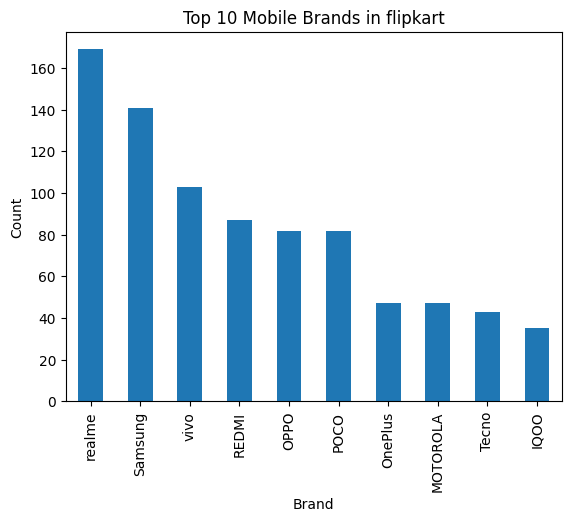

In [233]:
data_copy["Brand"].value_counts().head(10).plot(kind="bar",)
plt.title("Top 10 Mobile Brands in flipkart")
plt.ylabel("Count")
plt.show()

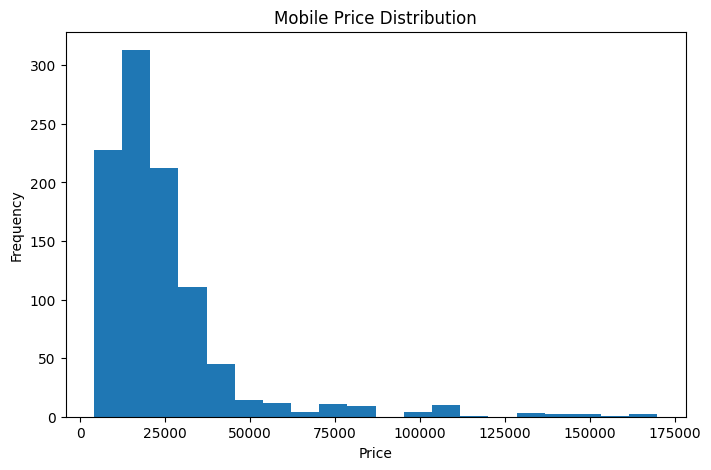

In [182]:
plt.figure(figsize=(8, 5))
plt.hist(data_copy['Price'].dropna(), bins=20)
plt.title('Mobile Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


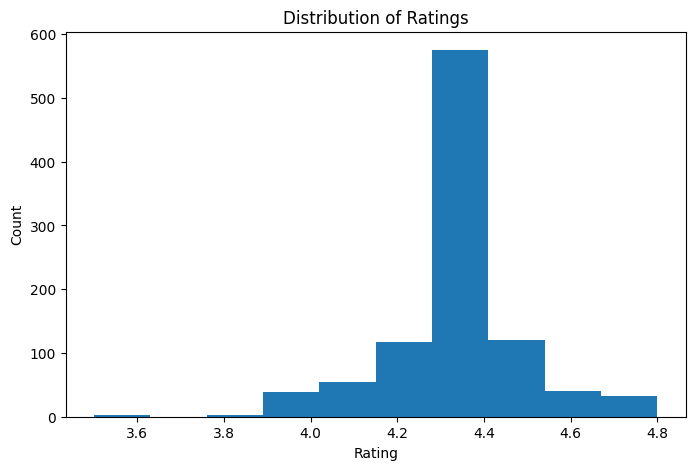

In [181]:
plt.figure(figsize=(8, 5))
plt.hist(data_copy['Rating'], bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

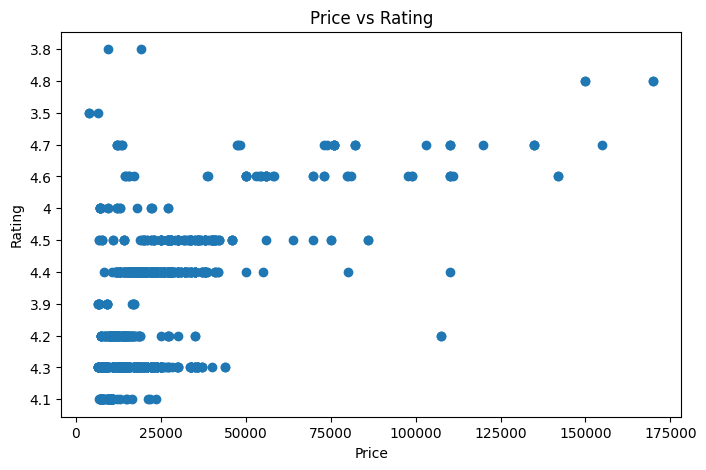

In [186]:
plt.figure(figsize=(8, 5))
plt.scatter(data_copy['Price'], df['Rating'])
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

<Figure size 900x500 with 0 Axes>

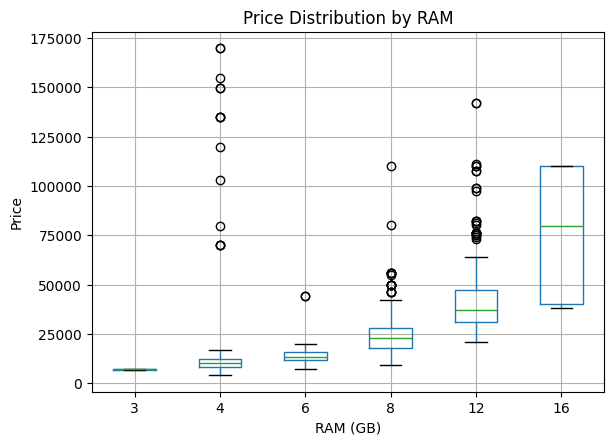

In [214]:
plt.figure(figsize=(9, 5))
data_copy.boxplot(column='Price', by='RAM')

plt.title('Price Distribution by RAM')
plt.suptitle('')   # Removes default pandas subtitle
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.show()

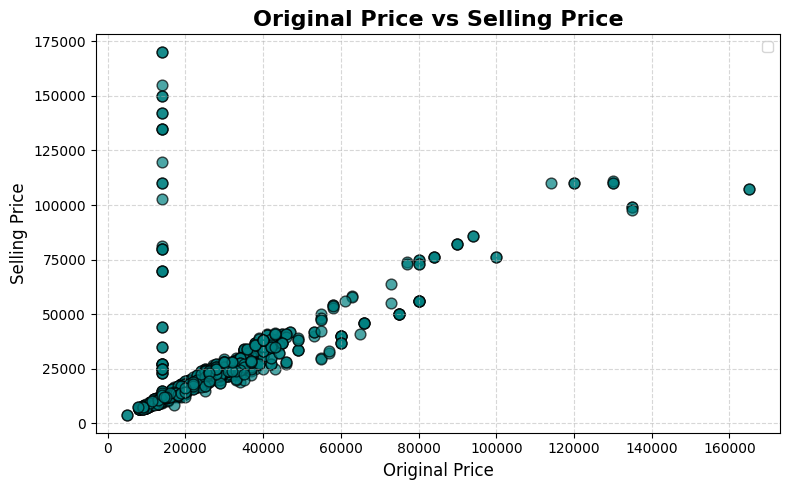

In [234]:

plt.figure(figsize=(8, 5))

plt.scatter(
    data_copy['Original_Price'],
    data_copy['Price'],
    color='teal',          # point color
    edgecolor='black',     # border color
    alpha=0.7,             # transparency
    s=60                   # marker size
)


plt.title('Original Price vs Selling Price', fontsize=16, fontweight='bold')
plt.xlabel('Original Price', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
Original Price vs Selling Price
Plot: Scatter Plot – Original Price vs Price
Strong positive correlation
Selling price is consistently lower than original price
Indicates:
Heavy use of discount strategies
Discounts increase with higher original prices

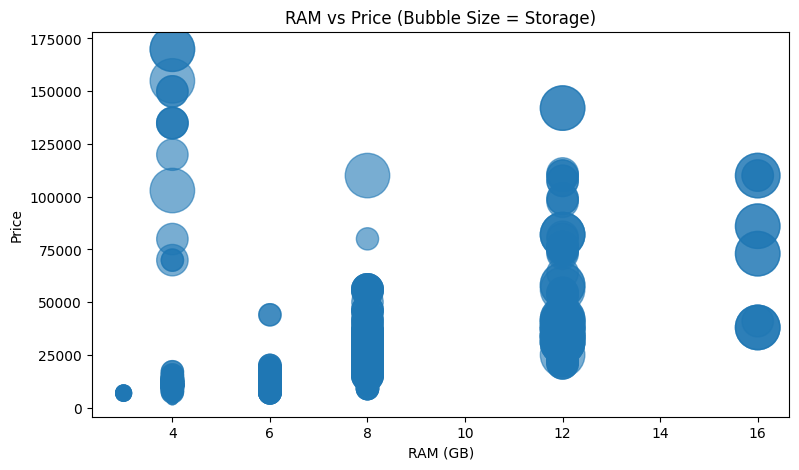

In [212]:
plt.figure(figsize=(9, 5))
plt.scatter(
    data_copy['RAM'],
    data_copy['Price'],
    s=data_copy['Storage'] * 2,   # bubble size proportional to storage
    alpha=0.6
)

plt.title('RAM vs Price (Bubble Size = Storage)')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.show()

In [ ]:
RAM vs Price (Bubble = Storage)
Plot: Bubble Chart – RAM vs Price, Size = Storage
Phones with same RAM but higher storage cost more.
Example:
8GB RAM with 256GB storage priced higher than 8GB/128GB
Confirms:
Storage is a key pricing factor, not just RAM
Users are willing to pay more for higher storage

<Axes: >

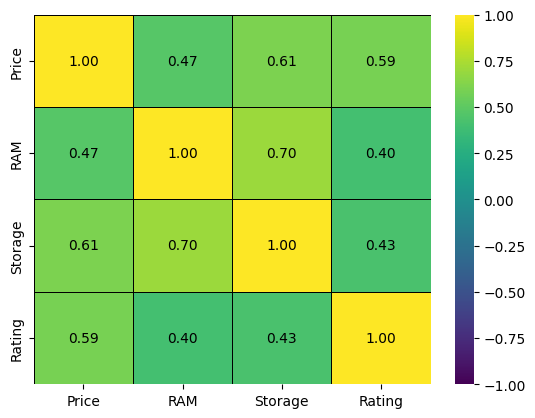

In [227]:
corr =data_copy[['Price', 'RAM', 'Storage', 'Rating']].corr()
sns.heatmap(corr,
            cmap="viridis",
            vmin=-1,
            vmax=1,
            annot=True,
            fmt=".2f",
            annot_kws={"size":10, "color":"black"},
            linewidths=0.5,
            linecolor="black",
            cbar=True,
            )

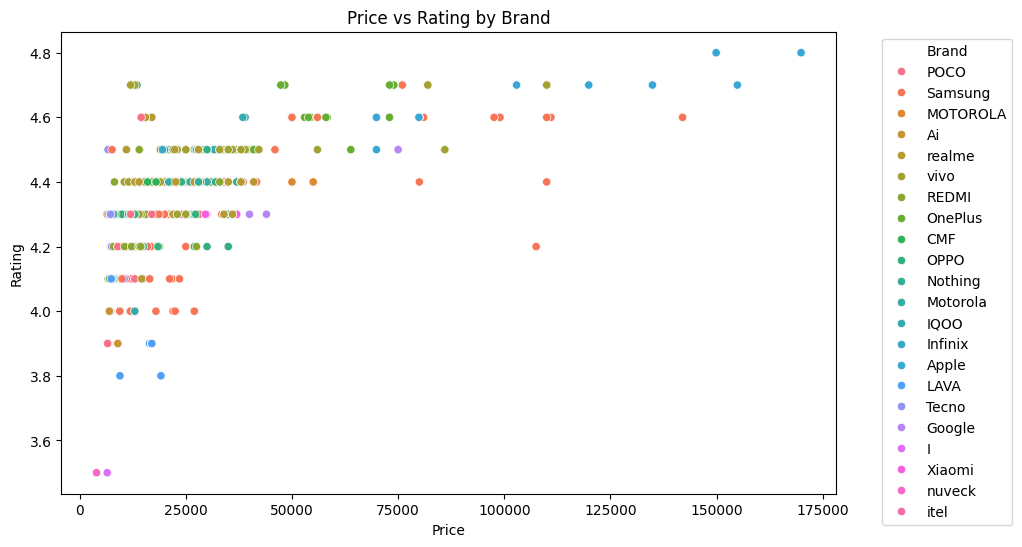

In [231]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data_copy,
    x='Price',
    y='Rating',
    hue='Brand',
    alpha=1
)

plt.title('Price vs Rating by Brand')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

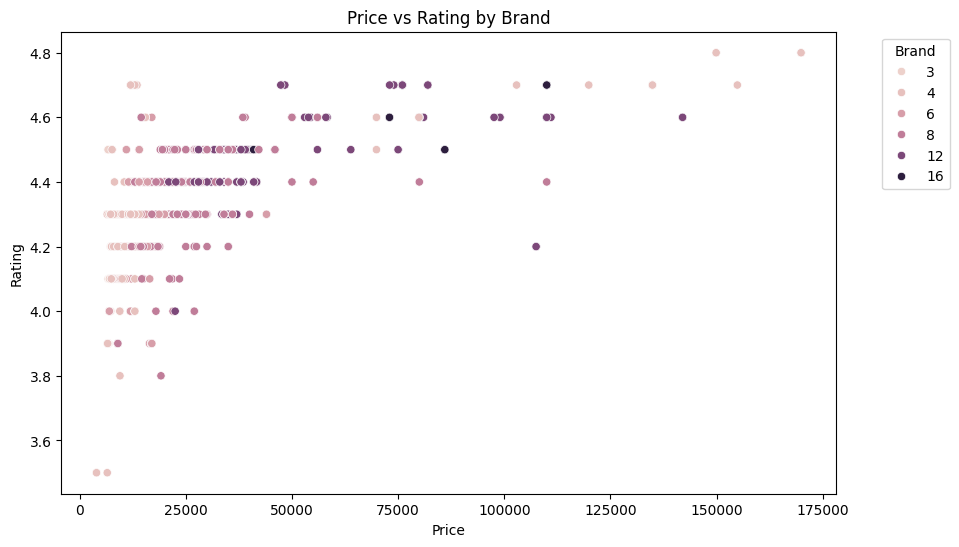

In [232]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data_copy,
    x='Price',
    y='Rating',
    hue='RAM',
    alpha=1
)

plt.title('Price vs Rating by Brand')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()